In [1]:
import numpy as np
import pandas as pd
from main import load_data, load_model

#create artficial dataset with features age - numerical, height - numerical, gender - categorical (m/w/d) and predict health risk - ordinal (low, medium, high)
np.random.seed(42)
n = 1000
age = np.random.randint(18,100,n)
height = np.random.randint(140,210,n)
gender = np.random.choice(["m","w","d"],n)
#calculate continuous health risk
health_risk =  0.3*np.array([1 if g == "w" else 0 for g in gender]) + 0.05*np.random.randn(n) + 0.6*age/100 + 0.1*height/200
#transform continuous health risk to ordinal health risk
health_risk = pd.qcut(health_risk,3,labels=[0,1,2])
df = pd.DataFrame({"age":age,"height":height, "gender":gender, "health_risk":health_risk})
df.to_csv("data/dummy.csv",index=False,sep=";")


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\wankm\Projects\ordinal_xai\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3579, in run_code
  File "C:\Users\wankm\AppData\Local\Temp\ipykernel_15928\798335219.py", line 2, in <module>
    np.random.seed(42)
    ^^
NameError: name 'np' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\wankm\Projects\ordinal_xai\venv\Lib\site-packages\pygments\styles\__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\wankm\Projects\ordinal_xai\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 2170, in showtraceback
  File "c:\Users\wankm\Projects\ordinal_xai\venv\Lib\site-packages\IPython\core\ultratb.py", line 1457, in structured_traceback
  File "c:\Users\wankm\

In [4]:
from models.clm import CLM
X,y = load_data("dummy.csv")

model = load_model("CLM",link="logit")

model.fit(X,y)

y_pred = model.predict(X)

y_prob = model.predict_proba(X)

y_pred,y_prob

model.params_




array([ 5.26940835,  0.37036894, -0.06415992, 10.62216765, -0.28741469,
        1.91846704])

In [7]:
from interpretation.pfi import PFI
int = PFI(model,X,y)

results = int.explain()


In [1]:
import numpy as np
# Create simple test data
y_true = np.array([0, 1, 2, 1, 0])
y_perfect_pred_proba = np.array([
    [1.0, 0.0, 0.0],  # Class 0
    [0.0, 1.0, 0.0],  # Class 1
    [0.0, 0.0, 1.0],  # Class 2
    [0.0, 1.0, 0.0],  # Class 1
    [1.0, 0.0, 0.0]   # Class 0
])
y_perfect_pred = y_perfect_pred_proba.argmax(axis=1)
y_worst_pred_proba = np.array([
    [0.0, 0.0, 1.0],  # Class 2
    [1.0, 0.0, 0.0],  # Class 0
    [1.0, 0.0, 0.0],  # Class 0
    [0.0, 0.0, 1.0],  # Class 2
    [0.0, 0.0, 1.0]   # Class 2
])
y_worst_pred = y_worst_pred_proba.argmax(axis=1)
y_uncertain_pred_proba = np.array([
    [0.5, 0.3, 0.2],  # Class 0
    [0.2, 0.5, 0.3],  # Class 1
    [0.1, 0.2, 0.7],  # Class 2
    [0.3, 0.4, 0.3],  # Class 1
    [0.8, 0.1, 0.1]   # Class 0
])
y_uncertain_pred = y_uncertain_pred_proba.argmax(axis=1)
y_one_error_pred_proba = np.array([
    [1.0, 0.0, 0.0],  # Class 0
    [0.0, 1.0, 0.0],  # Class 1
    [0.0, 0.0, 1.0],  # Class 2
    [0.0, 1.0, 0.0],  # Class 1
    [0.0, 0.0, 1.0]   # Class 0
])
y_one_error_pred = y_one_error_pred_proba.argmax(axis=1)

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate features
# 5 standard informative features
informative_features = {
    f'X_inf_{i}': np.random.normal(0, 1, n_samples) for i in range(5)
}

# 2 interaction-only informative features
interaction_features = {
    f'X_inter_{i}': np.random.normal(0, 1, n_samples) for i in range(2)
}
interaction_term = interaction_features['X_inter_0'] * interaction_features['X_inter_1']

# 3 features that only affect specific rank borders
border_features = {
    f'X_border_{i}': np.random.normal(0, 1, n_samples) for i in range(3)
}

# 20 noise features (now normally distributed)
noise_features = {
    f'X_noise_{i}': np.random.normal(0, 1, n_samples) for i in range(20)
}

# Correlated features
# Very strong correlation with X_inf_0
X_corr_strong = informative_features['X_inf_0'] + np.random.normal(0, 0.05, n_samples)
X_corr_strong = (X_corr_strong - np.mean(X_corr_strong)) / np.std(X_corr_strong)

# Very weak correlation with X_inf_1
X_corr_weak = informative_features['X_inf_1'] + np.random.normal(0, 2.0, n_samples)
X_corr_weak = (X_corr_weak - np.mean(X_corr_weak)) / np.std(X_corr_weak)

# Latent variable with standard linear informative features
latent = (2.0 * informative_features['X_inf_0']
          - 1.5 * informative_features['X_inf_1']
          + 1.2 * informative_features['X_inf_2']
          - 0.7 * informative_features['X_inf_3']
          + 0.5 * informative_features['X_inf_4']
          + np.random.normal(0, 0.7, n_samples))

# Add interaction term effect across all samples
latent += 2.0 * interaction_term

# Add border-specific effects
latent_adjusted = latent.copy()
latent_adjusted[(latent > -1.5) & (latent <= 0)] += 1.5 * border_features['X_border_0'][(latent > -1.5) & (latent <= 0)]
latent_adjusted[(latent > 0) & (latent <= 1.5)] += 1.5 * border_features['X_border_1'][(latent > 0) & (latent <= 1.5)]
latent_adjusted[(latent > 1.5) & (latent <= 3)] += 1.5 * border_features['X_border_2'][(latent > 1.5) & (latent <= 3)]

# Define thresholds for 5 classes
thresholds = [-np.inf, -1.5, 0, 1.5, 3, np.inf]

# Assign ordinal categories
y = np.digitize(latent_adjusted, thresholds) - 1

# Combine all features into a DataFrame
data = pd.DataFrame({**informative_features, **interaction_features, **border_features, **noise_features})
data['X_corr0_strong'] = X_corr_strong
data['X_corr1_weak'] = X_corr_weak
data['y'] = y

# Save to CSV
data.to_csv('data/FI_test.csv', index=False, sep=';')

print(data.head())



    X_inf_0   X_inf_1   X_inf_2   X_inf_3   X_inf_4  X_inter_0  X_inter_1  \
0  0.496714  1.399355 -0.675178 -1.907808 -0.863494  -0.423760  -1.114081   
1 -0.138264  0.924634 -0.144519 -0.860385 -0.031203  -0.453414  -0.630931   
2  0.647689  0.059630 -0.792420 -0.413606  0.018017  -1.795643  -0.942060   
3  1.523030 -0.646937 -0.307962  1.887688  0.472630  -0.330090  -0.547996   
4 -0.234153  0.698223 -1.893615  0.556553 -1.366858   0.732829  -0.214150   

   X_border_0  X_border_1  X_border_2  ...  X_noise_13  X_noise_14  \
0    0.785185   -0.033025    0.765402  ...    2.198837   -0.671374   
1   -1.777681   -0.503650    1.073413  ...    0.343355   -0.713799   
2    0.714746   -0.172375    0.498690  ...   -0.233590    1.425406   
3   -0.233724    0.714732   -1.942498  ...    0.976983    1.864414   
4    0.707458    1.277857   -0.155422  ...    0.842069   -0.928882   

   X_noise_15  X_noise_16  X_noise_17  X_noise_18  X_noise_19  X_corr0_strong  \
0    0.170874   -0.141343   -0.7837

In [12]:
#simple version
n_samples=1000
# Generate features
# 5 standard normal features
features = {
    f'X_{i}': np.random.normal(0, 1, n_samples) for i in range(5)
}

latent = 3 * features["X_0"] - 2 * features["X_1"] - features["X_2"] + np.random.normal(0,1,n_samples) # 4 and 5 are noise
# Define thresholds for 5 classes
thresholds = [-np.inf, -1.5, 0, 1.5, 3, np.inf] 

# Assign ordinal categories
y = np.digitize(latent, thresholds) - 1

data = pd.DataFrame({**features})
data["y"] = y
# Save to CSV
data.to_csv('data/FI_simple.csv', index=False, sep=';')

print(data.head()) 



        X_0       X_1       X_2       X_3       X_4  y
0  0.960895 -0.875781  0.038162  1.261745  0.193257  4
1 -0.369965  0.434668 -0.585079  0.007531 -0.292425  0
2 -0.579581 -0.193942  0.296729  2.066886  0.466237  0
3  0.933312  0.784308  1.124690  0.849618 -1.607576  2
4 -2.731540 -1.300966 -0.298190  0.574162  1.104704  0


In [3]:
import numpy as np
from utils.evaluation_metrics import cem,_calculate_proximity,_get_class_counts

y_true = np.array([0, 1, 2, 1, 0])
y_pred = np.array([2, 0, 0, 2, 2])

cem(y_true,y_true)









1.0

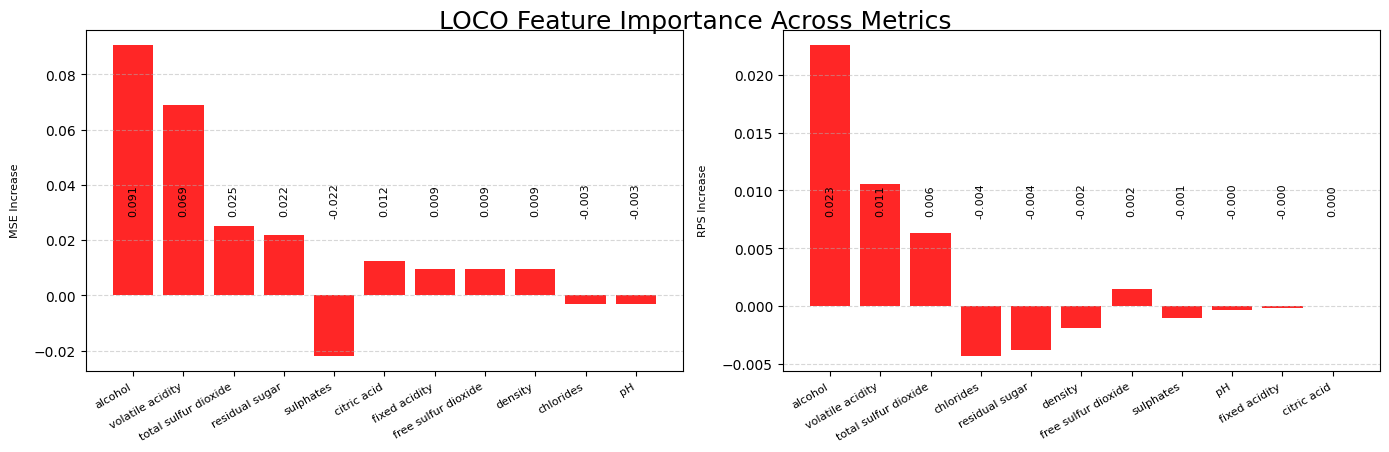

{'feature_importance': {'fixed acidity': {'mse': 0.009375000000000022,
   'ranked_probability_score': -0.0001391572526580065},
  'volatile acidity': {'mse': 0.06874999999999998,
   'ranked_probability_score': 0.01054921481361154},
  'citric acid': {'mse': 0.012499999999999956,
   'ranked_probability_score': 6.376247600481388e-05},
  'residual sugar': {'mse': 0.021874999999999978,
   'ranked_probability_score': -0.0037808788314978026},
  'chlorides': {'mse': -0.0031250000000000444,
   'ranked_probability_score': -0.004279243536805588},
  'free sulfur dioxide': {'mse': 0.009375000000000022,
   'ranked_probability_score': 0.001504580529231525},
  'total sulfur dioxide': {'mse': 0.025000000000000022,
   'ranked_probability_score': 0.006326146815875677},
  'density': {'mse': 0.009375000000000022,
   'ranked_probability_score': -0.001865418816886566},
  'pH': {'mse': -0.0031250000000000444,
   'ranked_probability_score': -0.0002851983175329864},
  'sulphates': {'mse': -0.021874999999999978,


In [ ]:
from sklearn import metrics
from interpretation.lime import LIME
from interpretation.loco import LOCO
from interpretation.pfi import PermutationImportance

from main import load_data, load_model

X,y = load_data("winequality-red.csv")

model = load_model("CLM",link_function="logit")

model.fit(X,y)

loco = LOCO(model,X,y,metrics=["mse","ranked_probability_score"])
loco.explain(plot=True)
















summand 0 -0.0
summand 1 -0.027153089545221106
summand 2 -2.433813098205229
summand 3 -0.8380928084610342
summand 4 -0.005982050687269343
summand 5 -0.0012506954358656197
summand 6 -3.71696007307506e-11
3.3062917423717892
summand 0 -0.0
summand 1 -0.026651999057404407
summand 2 -1.5462793086571176
summand 3 -1.6483213135395796
summand 4 -0.0333879883854166
summand 5 -0.0023189597393012476
summand 6 -1.2859047160432192e-11
3.256959569391678
summand 0 -0.0
summand 1 -0.027153089545221106
summand 2 -4.867626196410458
summand 3 -2.5142784253831025
summand 4 -0.023928202749077372
summand 5 -0.006253477179328099
summand 6 -2.2301760438450357e-10
7.439239391490206
summand 0 -0.0
summand 1 -0.026651999057404407
summand 2 -3.092558617314235
summand 3 -4.944963940618739
summand 4 -0.1335519535416664
summand 5 -0.01159479869650624
summand 6 -7.715428296259316e-11
8.209321309305706


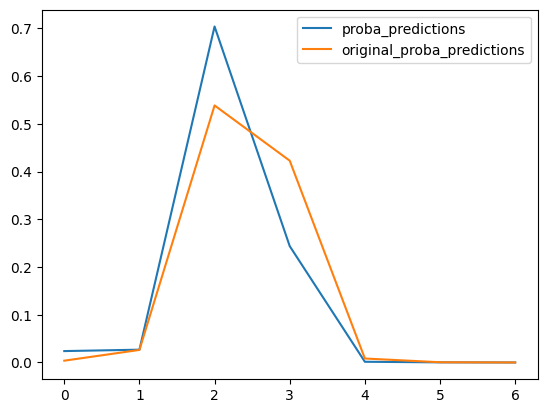

In [1]:
#test ordinal weighted ce
from utils.evaluation_metrics import ordinal_weighted_ce
import numpy as np
proba_predictions = np.array([[2.38769684e-02, 2.67877585e-02, 7.03855139e-01, 2.43735631e-01,
  1.49439495e-03, 2.50107805e-04, 6.19488156e-12]])
original_proba_predictions = np.array([[3.75847555e-03, 2.62999689e-02, 5.38438353e-01, 4.22727260e-01,
  8.31225764e-03, 4.63684413e-04, 2.14322101e-12]])
y_true = [2]

print(ordinal_weighted_ce(y_true,proba_predictions,alpha=1))
print(ordinal_weighted_ce(y_true,original_proba_predictions,alpha=1))

print(ordinal_weighted_ce(y_true,proba_predictions,alpha=2))
print(ordinal_weighted_ce(y_true,original_proba_predictions,alpha=2))


from matplotlib import pyplot as plt
plt.plot(proba_predictions[0],label="proba_predictions")
plt.plot(original_proba_predictions[0],label="original_proba_predictions")
plt.legend()
plt.show()




In [2]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("FI_test.csv")

model = ONN(hidden_layers=[64,128,64],patience=20,dropout=0.2)

model.fit(X,y)

evaluate_model(model,X,y)



AttributeError: 'ONN' object has no attribute 'output_layer'

In [12]:


print(model.predict_proba(X=X))



[[9.2606336e-07 1.0149822e-02 9.8984927e-01]
 [9.9258131e-01 7.4186013e-03 1.7217570e-07]
 [3.9486683e-04 3.1122729e-01 6.8837786e-01]
 ...
 [4.7944131e-06 5.0435159e-02 9.4956005e-01]
 [5.9905909e-07 4.1832910e-03 9.9581611e-01]
 [3.2409084e-01 6.6147071e-01 1.4438479e-02]]


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


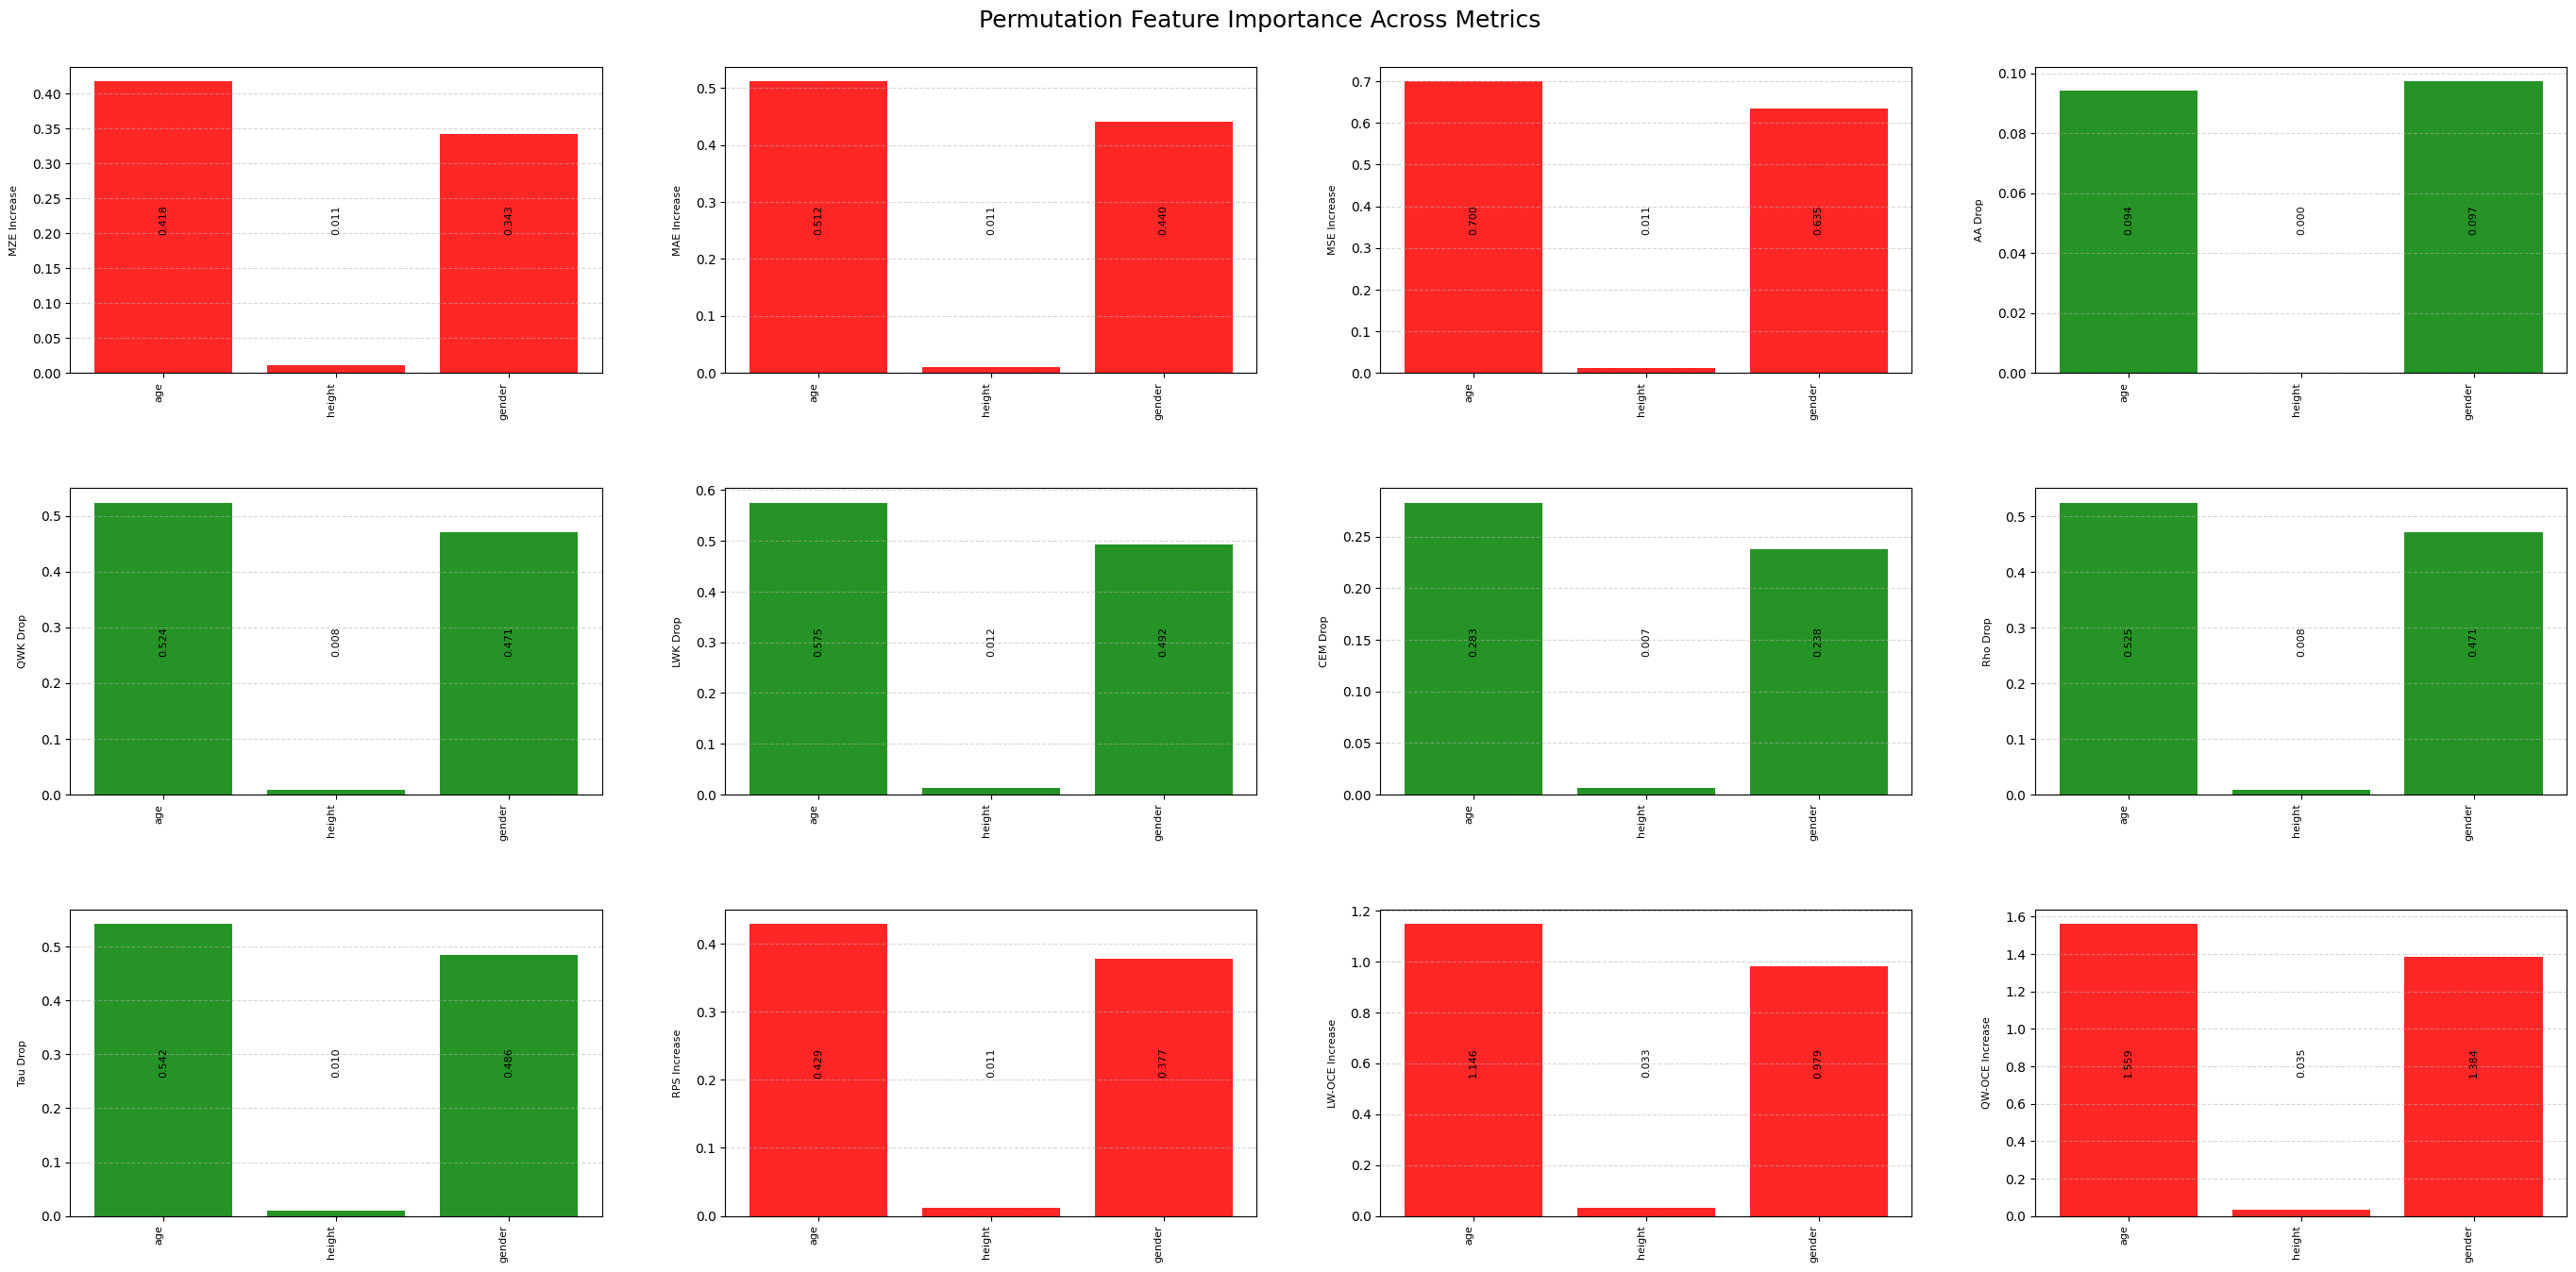

{'mze': {'features': ['age', 'height', 'gender'],
  'importances_mean': array([0.4178, 0.0106, 0.3426]),
  'importances_std': array([0.01735972, 0.00174356, 0.01460959]),
  'importances': array([[0.441, 0.429, 0.394, 0.402, 0.423],
         [0.009, 0.012, 0.012, 0.008, 0.012],
         [0.336, 0.35 , 0.343, 0.364, 0.32 ]])},
 'mae': {'features': ['age', 'height', 'gender'],
  'importances_mean': array([0.512 , 0.0106, 0.44  ]),
  'importances_std': array([0.0179555 , 0.00174356, 0.01627268]),
  'importances': array([[0.533, 0.528, 0.489, 0.493, 0.517],
         [0.009, 0.012, 0.012, 0.008, 0.012],
         [0.447, 0.436, 0.441, 0.463, 0.413]])},
 'mse': {'features': ['age', 'height', 'gender'],
  'importances_mean': array([0.7004, 0.0106, 0.6348]),
  'importances_std': array([0.02027412, 0.00174356, 0.02778777]),
  'importances': array([[0.717, 0.726, 0.679, 0.675, 0.705],
         [0.009, 0.012, 0.012, 0.008, 0.012],
         [0.669, 0.608, 0.637, 0.661, 0.599]])},
 'adjacent_accuracy

In [4]:
from ordinal_xai.interpretation import PFI
from ordinal_xai.models import OBD
from ordinal_xai.utils import load_data

X,y = load_data("data/dummy.csv")

model = OBD(base_classifier="rf")

model.fit(X,y)

interpretation = PFI(model,X,y)

interpretation.explain(plot=True)



In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [1]:
from ordinal_xai.utils import load_data

In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [30]:
from interpretation.pfi import PFI

pfi = PFI(model,X,y)

pfi.explain(plot=True)

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        2.8231        2.6805  0.1270
      2        2.6535        2.5356  0.1236
      3        2.5176        2.4326  0.0976
      4        2.3726        2.3027  0.1026
      5        2.1519        2.1907  0.0966
      6        2.1402        2.1254  0.0967
      7        2.0639        2.0803  0.1251
      8        2.0600        2.1188  0.1125
      9        2.0492        2.0578  0.1130
     10        1.8422        2.0713  0.1108
     11        1.7885        1.9575  0.1215
     12        1.7132        1.8778  0.1119
     13        1.6527        1.8608  0.1178
     14        1.5819        1.9305  0.1101
     15        1.5340        2.0295  0.1128
     16        1.4600        1.8985  0.1186
     17        1.3988        1.9563  0.1176
     18        1.2910        1.9817  0.1127
     19        1.2684        2.0893  0.1134
     20        1.2311        2.1570  0.1129
     21        1.1743        2.0

KeyError: 'ranked_probability_score'

Error in callback <function flush_figures at 0x0000020498491C60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 